In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import cv2 as cv
from google.colab.patches import cv2_imshow
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
data = np.loadtxt('drive/MyDrive/CV_data/510_cluster_dataset.txt')
img = cv.imread("drive/MyDrive/CV_data/Kmean_img2.jpg")


In [ ]:
scale_percent = 25
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
print(img.shape)

(180, 320, 3)


In [ ]:
img_resized = img.reshape((-1,3))
img_resized = np.float32(img_resized)
print(img_resized.shape)

(57600, 3)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


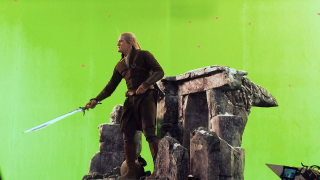

In [ ]:
cv2_imshow(img)

In [ ]:
print(data)

[[-0.169513 -0.24397 ]
 [-1.462618 -1.333294]
 [ 0.769671  0.849244]
 ...
 [ 2.114334  1.031347]
 [ 2.061401 -0.067838]
 [ 1.8857    1.003853]]


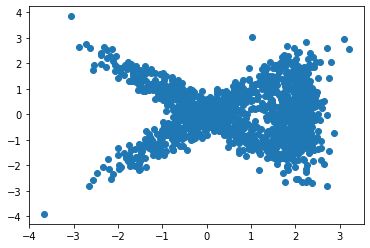

In [ ]:
plt.scatter(data[:, 0],data[:, 1]);

In [ ]:
# Calculate Euclidean_distance
def euclidean_distance(x1, x2):
    result = np.sqrt(np.sum((x1-x2)**2))
    return result

In [ ]:
# Assignment step
def assignment(means,data, k):
    clusters = {}
    labels = np.empty((len(data),1))
    for j in range(k):
        clusters[j] = []
    for index, feature in enumerate(data):
        distances = [euclidean_distance(feature, means[k]) for k in range(len(means))]
        classification = distances.index(min(distances))
        clusters[classification].append(feature)
        labels[index] = classification
    return clusters, labels

In [ ]:
# Update Step
def update(means, clusters):
    for i in clusters:
        means[i] = np.average(clusters[i],axis = 0)
    return means

In [ ]:
# Plotting starts here, the colors
colors = 10*["r", "g", "c", "b", "m"]


In [ ]:
# Plot the graph
def plot_graph(clusters, means):
    for classification in clusters:
        color = colors[classification]
        for features in clusters[classification]:
          plt.scatter(features[0], features[1], color = color,s = 30)
        
    plt.show()

In [ ]:
# Compute SSE
def SSE(clusters,means, k):
    sum = 0
    for i in range(k):
        sum += np.sum(euclidean_distance(clusters[i], means[i]))
    return sum

In [ ]:
def train(r, k, data):
  for i in range(r):
    means = rd.choices(data, k=k)
    isOptimal = False
    previous_SSE = 0
    for j in range(500):
        # Assign step
        clusters, labels = assignment(means, data, k)
        # Update Step
        means = update(means, clusters)
        curr_SSE= SSE(clusters,means, k)
        if(curr_SSE - previous_SSE < 0.0001):
            isOptimal = True
        if isOptimal:
            print(curr_SSE)
            break
        previous_SSE = curr_SSE
    #plot_graph(clusters, means)
    plot_image(clusters,means, labels)


In [ ]:
# Plot the graph
def plot_image(clusters, means, labels):
  centers = np.uint8(means)
  labels = labels.astype(int) 
  result_image = centers[labels.flatten()]
  result_image = result_image.reshape(img.shape)
  cv2_imshow(result_image)

15293.79443359375


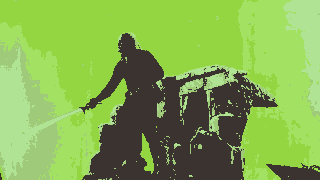

In [ ]:
train(1,5, img_resized)